In [5]:
#Importar librerias necesarias
#%pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

In [6]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Data=pd.read_csv("diamonds.csv")

In [7]:
#Identificar valores nulos por columna
Valores_Nulos=Data.isnull().sum()
Valores_Nulos

,0
carat,3
cut,0
color,0
clarity,0
depth,2
table,3
price,3
x,1
y,1
z,4


In [8]:
#Información tipos de columnas
Tipos_Columnas = Data.dtypes
print(Tipos_Columnas)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object


In [9]:
#Realizamos una copia del dataframe
Copia_data= Data.copy()

In [10]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
Copia_data["carat"]=Copia_data["carat"].fillna(round(Copia_data['carat'].mean(),1))
Copia_data["depth"]=Copia_data["depth"].fillna(round(Copia_data['depth'].mean(),1))
Copia_data["x"]=Copia_data["x"].fillna(round(Copia_data['x'].mean(),1))
Copia_data["y"]=Copia_data["y"].fillna(round(Copia_data['y'].mean(),1))
Copia_data["z"]=Copia_data["z"].fillna(round(Copia_data['z'].mean(),1))

In [11]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
Copia_data["price"]=Copia_data["price"].fillna("0000")
Copia_data["table"]=Copia_data["table"].fillna("0000")

In [12]:
#Corroboramos valores nulos
valores_nulos=Copia_data.isnull().sum()
valores_nulos

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [13]:
#Eliminar Outliers: Deviación Estandar
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Copia_data.select_dtypes(include = 'object')
columnas_cuantitativas = Copia_data.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

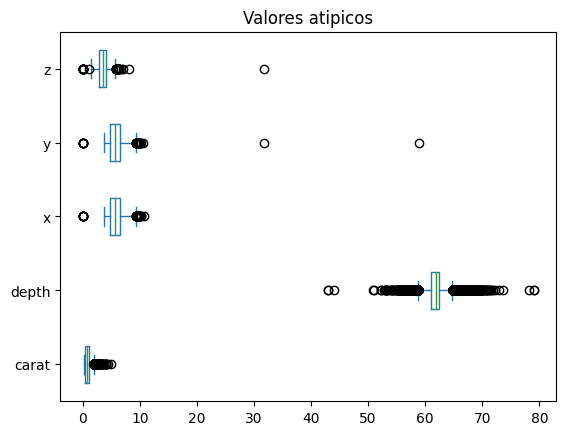

In [14]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [15]:
#Identificar los limites superior e inferior
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido carat     2.219953
depth    66.047217
x         9.096441
y         9.160929
z         5.655794
dtype: float64
Limite inferior permitido carat    -0.624090
depth    57.451571
x         2.365894
y         2.308121
z         1.421668
dtype: float64


In [16]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [17]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

,0
carat,439
depth,685
x,43
y,34
z,55


In [18]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))
columnas_cuantitativas_limpio

,carat,depth,x,y,z
0,0.23,61.5,3.95,3.98,2.43
1,0.21,59.8,3.89,3.84,2.31
2,0.23,61.7,4.05,4.07,2.31
3,0.29,62.4,4.20,4.23,2.63
4,0.31,63.3,4.34,4.35,2.75
...,...,...,...,...,...
53935,0.72,60.8,5.75,5.76,3.50
53936,0.72,63.1,5.69,5.75,3.61
53937,0.70,62.8,5.66,5.68,3.56
53938,0.86,61.7,6.15,6.12,3.74


In [19]:
#Se juntan las columnas cualitativas con las cuantitativas
Data_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Data_outliers

,carat,depth,x,y,z,cut,color,clarity,table,price
0,0.23,61.5,3.95,3.98,2.43,Ideal,E,SI2,55.0,326.0
1,0.21,59.8,3.89,3.84,2.31,Premium,E,SI1,61.0,326.0
2,0.23,61.7,4.05,4.07,2.31,Good,E,VS1,65.0,327.0
3,0.29,62.4,4.20,4.23,2.63,Premium,I,VS2,58.0,334.0
4,0.31,63.3,4.34,4.35,2.75,Good,J,SI2,58.0,335.0
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,5.75,5.76,3.50,Ideal,D,SI1,57.0,2757.0
53936,0.72,63.1,5.69,5.75,3.61,Good,D,SI1,55.0,2757.0
53937,0.70,62.8,5.66,5.68,3.56,Very Good,D,SI1,60.0,2757.0
53938,0.86,61.7,6.15,6.12,3.74,Premium,H,SI2,58.0,2757.0


In [20]:
#Comprobamos que no existan valores nulos
valores_nulos_Data_outliers = Data_outliers.isnull().sum()
valores_nulos_Data_outliers

,0
carat,0
depth,0
x,0
y,0
z,0
cut,0
color,0
clarity,0
table,0
price,0


In [21]:
#Modelo de Correlación
#Extraer características de análisis univariado y generar tabla de frecuencias
freq_tbl(Data_outliers)
Data_outliers.dtypes

         cut  frequency  percentage  cumulative_perc
0      Ideal      21551    0.399537         0.399537
1    Premium      13791    0.255673         0.655209
2  Very Good      12082    0.223990         0.879199
3       Good       4906    0.090953         0.970152
4       Fair       1610    0.029848         1.000000

----------------------------------------------------------------

  color  frequency  percentage  cumulative_perc
0     G      11292    0.209344         0.209344
1     E       9797    0.181628         0.390971
2     F       9542    0.176900         0.567872
3     H       8304    0.153949         0.721821
4     D       6775    0.125603         0.847423
5     I       5422    0.100519         0.947942
6     J       2808    0.052058         1.000000

----------------------------------------------------------------

  clarity  frequency  percentage  cumulative_perc
0     SI1      13065    0.242214         0.242214
1     VS2      12258    0.227253         0.469466
2     SI2     

,0
carat,float64
depth,float64
x,float64
y,float64
z,float64
cut,object
color,object
clarity,object
table,object
price,object


In [22]:
#Convertir las variables a numerico
Data_outliers['price'] = Data_outliers['price'].astype(float)
Data_outliers['table'] = Data_outliers['table'].astype(float)

In [23]:
#Modelo de Correlación, volver a revisar
#Extraer características de análisis univariado y generar tabla de frecuencias
freq_tbl(Data_outliers)
Data_outliers.dtypes

         cut  frequency  percentage  cumulative_perc
0      Ideal      21551    0.399537         0.399537
1    Premium      13791    0.255673         0.655209
2  Very Good      12082    0.223990         0.879199
3       Good       4906    0.090953         0.970152
4       Fair       1610    0.029848         1.000000

----------------------------------------------------------------

  color  frequency  percentage  cumulative_perc
0     G      11292    0.209344         0.209344
1     E       9797    0.181628         0.390971
2     F       9542    0.176900         0.567872
3     H       8304    0.153949         0.721821
4     D       6775    0.125603         0.847423
5     I       5422    0.100519         0.947942
6     J       2808    0.052058         1.000000

----------------------------------------------------------------

  clarity  frequency  percentage  cumulative_perc
0     SI1      13065    0.242214         0.242214
1     VS2      12258    0.227253         0.469466
2     SI2     

,0
carat,float64
depth,float64
x,float64
y,float64
z,float64
cut,object
color,object
clarity,object
table,float64
price,float64


In [24]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Var_Indep= Data_outliers[['carat']]
Var_Dep= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

**REGRESIÓN SIMPLE**

In [25]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7905.22914591]),
 'rank_': 1,
 'singular_': array([104.13800591]),
 'intercept_': -2268.1016589502456}

0.8884854071068619

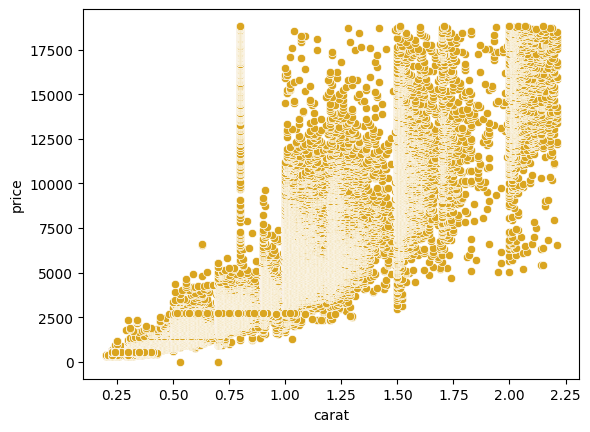

In [26]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='carat', y='price', color="goldenrod", data=Data_outliers)
coef_Deter=model.score(X=Var_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

In [27]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Var_Indep2= Data_outliers[['depth']]
Var_Dep2= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [28]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Var_Indep2, y=Var_Dep2)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-45.77791801]),
 'rank_': 1,
 'singular_': array([295.83615478]),
 'intercept_': 6759.063697371282}

0.014616179390626772

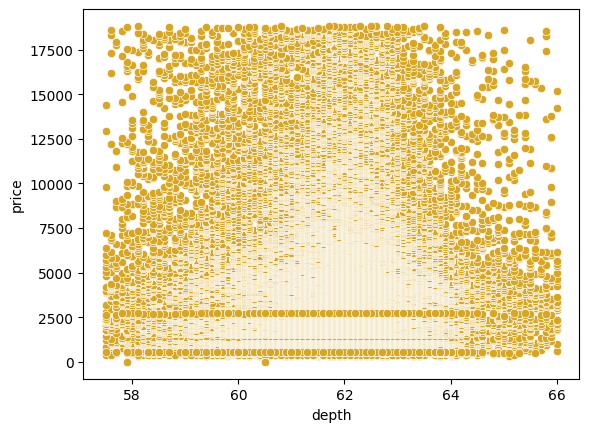

In [29]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='depth', y='price', color="goldenrod", data=Data_outliers)
coef_Deter2=model2.score(X=Var_Indep2, y=Var_Dep2)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

In [30]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Var_Indep3= Data_outliers[['table']]
Var_Dep3= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [31]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Var_Indep3, y=Var_Dep3)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['table'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([218.81029949]),
 'rank_': 1,
 'singular_': array([528.39730959]),
 'intercept_': -8638.879641329004}

0.12478286044053256

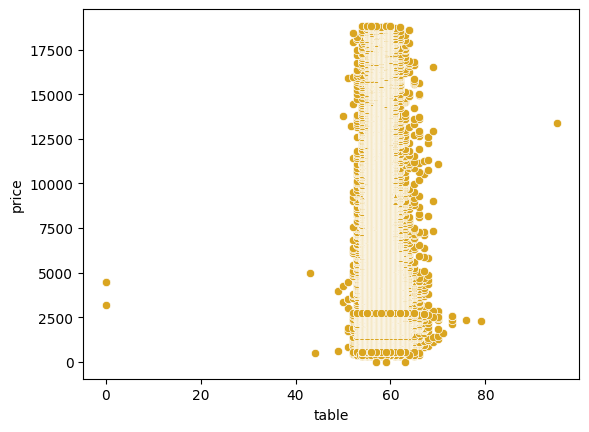

In [32]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='table', y='price', color="goldenrod", data=Data_outliers)
coef_Deter3=model3.score(X=Var_Indep3, y=Var_Dep3)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

**REGRESION MULTIPLE**

In [33]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Vars_IndepM= Data_outliers[["carat","depth"]]
Var_DepM= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()

In [34]:
#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelM.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'depth'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([7907.70936741,  -77.24141358]),
 'rank_': 2,
 'singular_': array([295.83882763, 104.13041252]),
 'intercept_': 2498.960195144506}

In [35]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

0.888827572970412

In [36]:
#Modelo predictivo
y_pred= modelM.predict(X=Data_outliers[["carat","depth"]])
y_pred

array([-432.61358536, -459.45736963, -448.06186808, ..., 3183.59597967,
       4533.79503339, 3625.32629619])

In [37]:
#Añadir una nueva columna al DataFrame donde se guarden los valores de y_pred
Data_outliers.insert(0, 'Predicciones', y_pred)
Data_outliers

,Predicciones,carat,depth,x,y,z,cut,color,clarity,table,price
0,-432.613585,0.23,61.5,3.95,3.98,2.43,Ideal,E,SI2,55.0,326.0
1,-459.457370,0.21,59.8,3.89,3.84,2.31,Premium,E,SI1,61.0,326.0
2,-448.061868,0.23,61.7,4.05,4.07,2.31,Good,E,VS1,65.0,327.0
3,-27.668296,0.29,62.4,4.20,4.23,2.63,Premium,I,VS2,58.0,334.0
4,60.968620,0.31,63.3,4.34,4.35,2.75,Good,J,SI2,58.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...
53935,3496.232994,0.72,60.8,5.75,5.76,3.50,Ideal,D,SI1,57.0,2757.0
53936,3318.577743,0.72,63.1,5.69,5.75,3.61,Good,D,SI1,55.0,2757.0
53937,3183.595980,0.70,62.8,5.66,5.68,3.56,Very Good,D,SI1,60.0,2757.0
53938,4533.795033,0.86,61.7,6.15,6.12,3.74,Premium,H,SI2,58.0,2757.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carat', ylabel='price'>

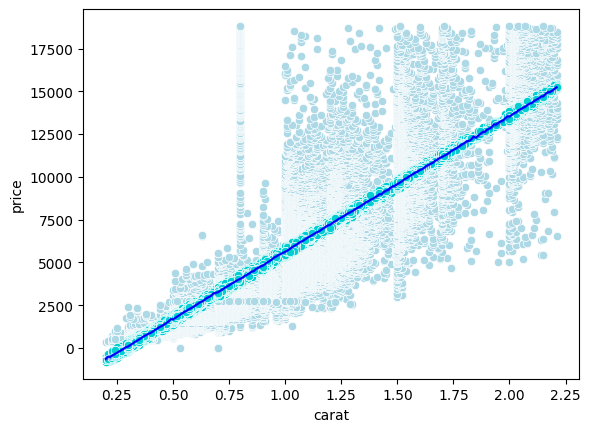

In [51]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='carat', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='carat', y='Predicciones', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='carat', y='Predicciones', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='depth', ylabel='price'>

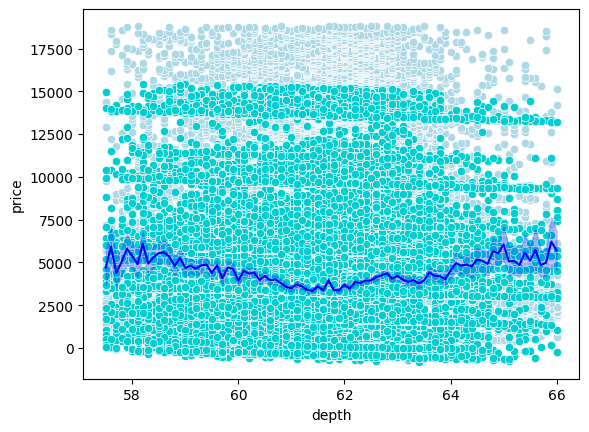

In [49]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='depth', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='depth', y='Predicciones', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='depth', y='Predicciones', color="blue", data=Data_outliers)

In [40]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Vars_IndepM2= Data_outliers[["carat","table"]]
Var_DepM2= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM2= LinearRegression()

In [41]:
#Ajustamos el modelo con las variables antes declaradas
modelM2.fit(X=Vars_IndepM2, y=Var_DepM2)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelM2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'table'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([7961.53007094,  -62.00054579]),
 'rank_': 2,
 'singular_': array([528.73869613, 102.39058682]),
 'intercept_': 1249.9202474004237}

In [42]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_DeterM2=modelM2.score(X=Vars_IndepM2, y=Var_DepM2)
coef_CorrelM2=np.sqrt(coef_DeterM2)
coef_CorrelM2

0.8891661471323602

In [53]:
#Modelo predictivo
y_pred2= modelM2.predict(X=Data_outliers[["carat","table"]])
y_pred2

array([-328.95785481, -860.19173098, -948.96331273, ..., 3102.95854957,
       4500.8044525 , 3811.03778207])

In [55]:
#Añadir una nueva columna al DataFrame donde se guarden los valores de y_pred
Data_outliers.insert(0, 'Predicciones2', y_pred2)
Data_outliers

,Predicciones2,Predicciones,carat,depth,x,y,z,cut,color,clarity,table,price
0,-328.957855,-432.613585,0.23,61.5,3.95,3.98,2.43,Ideal,E,SI2,55.0,326.0
1,-860.191731,-459.457370,0.21,59.8,3.89,3.84,2.31,Premium,E,SI1,61.0,326.0
2,-948.963313,-448.061868,0.23,61.7,4.05,4.07,2.31,Good,E,VS1,65.0,327.0
3,-37.267688,-27.668296,0.29,62.4,4.20,4.23,2.63,Premium,I,VS2,58.0,334.0
4,121.962913,60.968620,0.31,63.3,4.34,4.35,2.75,Good,J,SI2,58.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3448.190788,3496.232994,0.72,60.8,5.75,5.76,3.50,Ideal,D,SI1,57.0,2757.0
53936,3572.191880,3318.577743,0.72,63.1,5.69,5.75,3.61,Good,D,SI1,55.0,2757.0
53937,3102.958550,3183.595980,0.70,62.8,5.66,5.68,3.56,Very Good,D,SI1,60.0,2757.0
53938,4500.804453,4533.795033,0.86,61.7,6.15,6.12,3.74,Premium,H,SI2,58.0,2757.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carat', ylabel='price'>

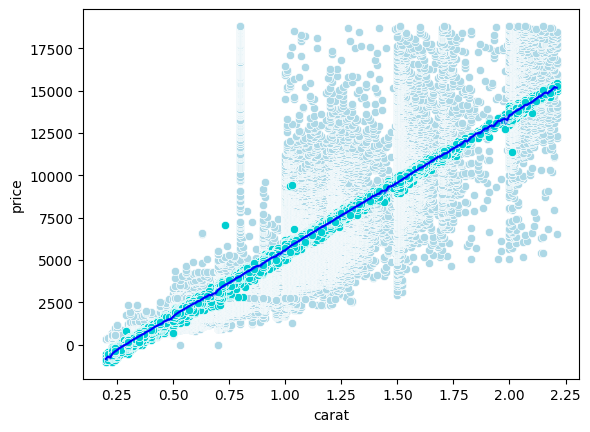

In [63]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='carat', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='carat', y='Predicciones2', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='carat', y='Predicciones2', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='table', ylabel='price'>

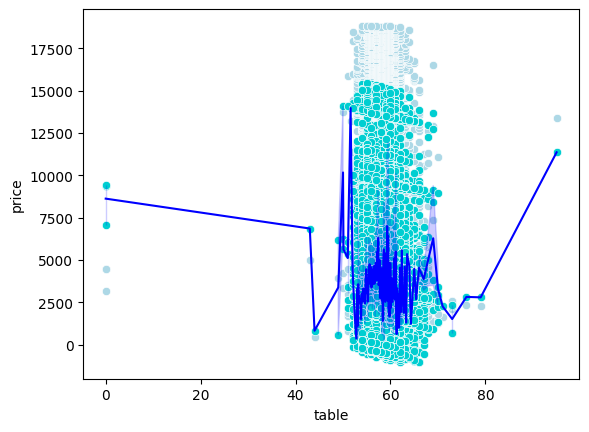

In [62]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='table', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='table', y='Predicciones2', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='table', y='Predicciones2', color="blue", data=Data_outliers)

In [64]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Vars_IndepM3= Data_outliers[["depth","table"]]
Var_DepM3= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM3= LinearRegression()

In [65]:
#Ajustamos el modelo con las variables antes declaradas
modelM3.fit(X=Vars_IndepM3, y=Var_DepM3)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelM3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth', 'table'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 68.40767193, 229.48000804]),
 'rank_': 2,
 'singular_': array([537.24608127, 279.44479851]),
 'intercept_': -13475.495913904211}

In [66]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_DeterM3=modelM3.score(X=Vars_IndepM3, y=Var_DepM3)
coef_CorrelM3=np.sqrt(coef_DeterM3)
coef_CorrelM3

0.1265337508396512

In [67]:
#Modelo predictivo
y_pred3= modelM3.predict(X=Data_outliers[["depth","table"]])
y_pred3

array([3352.97635191, 4613.56335788, 5661.45796671, ..., 4589.30636562,
       4055.09791042, 3400.86172225])

In [68]:
#Añadir una nueva columna al DataFrame donde se guarden los valores de y_pred
Data_outliers.insert(0, 'Predicciones3', y_pred3)
Data_outliers

,Predicciones3,Predicciones2,Predicciones,carat,depth,x,y,z,cut,color,clarity,table,price
0,3352.976352,-328.957855,-432.613585,0.23,61.5,3.95,3.98,2.43,Ideal,E,SI2,55.0,326.0
1,4613.563358,-860.191731,-459.457370,0.21,59.8,3.89,3.84,2.31,Premium,E,SI1,61.0,326.0
2,5661.457967,-948.963313,-448.061868,0.23,61.7,4.05,4.07,2.31,Good,E,VS1,65.0,327.0
3,4102.983281,-37.267688,-27.668296,0.29,62.4,4.20,4.23,2.63,Premium,I,VS2,58.0,334.0
4,4164.550186,121.962913,60.968620,0.31,63.3,4.34,4.35,2.75,Good,J,SI2,58.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3764.050998,3448.190788,3496.232994,0.72,60.8,5.75,5.76,3.50,Ideal,D,SI1,57.0,2757.0
53936,3462.428627,3572.191880,3318.577743,0.72,63.1,5.69,5.75,3.61,Good,D,SI1,55.0,2757.0
53937,4589.306366,3102.958550,3183.595980,0.70,62.8,5.66,5.68,3.56,Very Good,D,SI1,60.0,2757.0
53938,4055.097910,4500.804453,4533.795033,0.86,61.7,6.15,6.12,3.74,Premium,H,SI2,58.0,2757.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='depth', ylabel='price'>

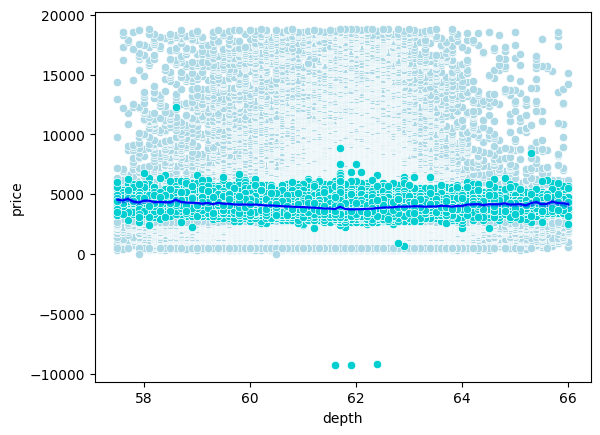

In [69]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='depth', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='depth', y='Predicciones3', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='depth', y='Predicciones3', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='table', ylabel='price'>

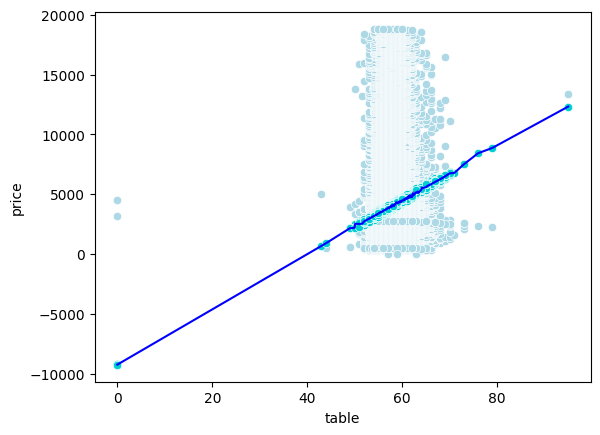

In [70]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='table', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='table', y='Predicciones3', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='table', y='Predicciones3', color="blue", data=Data_outliers)

In [71]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Vars_IndepM4= Data_outliers[["x","y","z"]]
Var_DepM4= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM4= LinearRegression()

In [72]:
#Ajustamos el modelo con las variables antes declaradas
modelM4.fit(X=Vars_IndepM4, y=Var_DepM4)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelM4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['x', 'y', 'z'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-199.84630086, 2862.02307262,  861.27081379]),
 'rank_': 3,
 'singular_': array([397.93573744,  21.2723627 ,  12.2512154 ]),
 'intercept_': -14374.677896404119}

In [73]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_DeterM4=modelM4.score(X=Vars_IndepM4, y=Var_DepM4)
coef_CorrelM4=np.sqrt(coef_DeterM4)
coef_CorrelM4

0.8866170973595934

In [74]:
#Modelo predictivo
y_pred4= modelM4.predict(X=Data_outliers[["x","y","z"]])
y_pred4

array([-1680.33087827, -2172.37582804, -1546.08592947, ...,
        3816.6071903 ,  5133.00140131,  4395.31936805])

In [75]:
#Añadir una nueva columna al DataFrame donde se guarden los valores de y_pred
Data_outliers.insert(0, 'Predicciones4', y_pred4)
Data_outliers

,Predicciones4,Predicciones3,Predicciones2,Predicciones,carat,depth,x,y,z,cut,color,clarity,table,price
0,-1680.330878,3352.976352,-328.957855,-432.613585,0.23,61.5,3.95,3.98,2.43,Ideal,E,SI2,55.0,326.0
1,-2172.375828,4613.563358,-860.191731,-459.457370,0.21,59.8,3.89,3.84,2.31,Premium,E,SI1,61.0,326.0
2,-1546.085929,5661.457967,-948.963313,-448.061868,0.23,61.7,4.05,4.07,2.31,Good,E,VS1,65.0,327.0
3,-842.532523,4102.983281,-37.267688,-27.668296,0.29,62.4,4.20,4.23,2.63,Premium,I,VS2,58.0,334.0
4,-423.715738,4164.550186,121.962913,60.968620,0.31,63.3,4.34,4.35,2.75,Good,J,SI2,58.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3975.906620,3764.050998,3448.190788,3496.232994,0.72,60.8,5.75,5.76,3.50,Ideal,D,SI1,57.0,2757.0
53936,4054.016957,3462.428627,3572.191880,3318.577743,0.72,63.1,5.69,5.75,3.61,Good,D,SI1,55.0,2757.0
53937,3816.607190,4589.306366,3102.958550,3183.595980,0.70,62.8,5.66,5.68,3.56,Very Good,D,SI1,60.0,2757.0
53938,5133.001401,4055.097910,4500.804453,4533.795033,0.86,61.7,6.15,6.12,3.74,Premium,H,SI2,58.0,2757.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='price'>

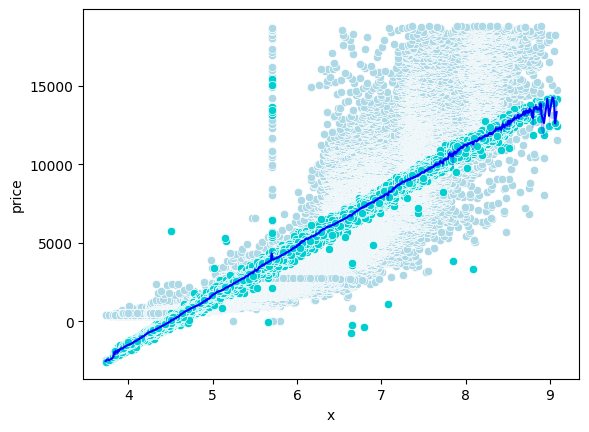

In [76]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='x', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='x', y='Predicciones4', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='x', y='Predicciones4', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='price'>

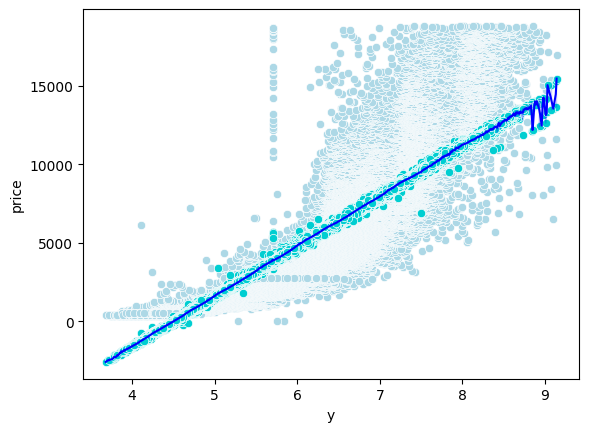

In [77]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='y', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='y', y='Predicciones4', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='y', y='Predicciones4', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='z', ylabel='price'>

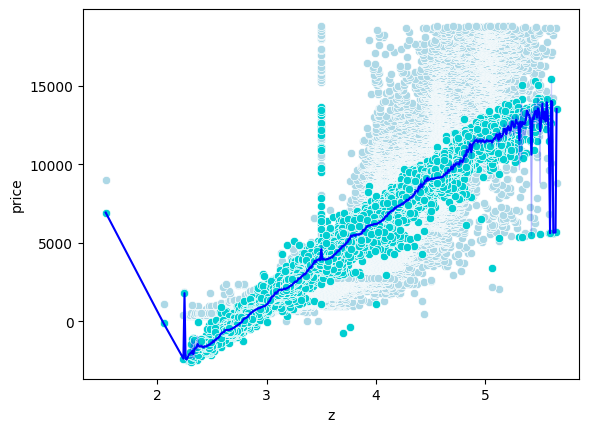

In [78]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='z', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='z', y='Predicciones4', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='z', y='Predicciones4', color="blue", data=Data_outliers)

In [79]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Vars_IndepM5= Data_outliers[["x","y","z","carat","depth"]]
Var_DepM5= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM5= LinearRegression()

In [80]:
#Ajustamos el modelo con las variables antes declaradas
modelM5.fit(X=Vars_IndepM5, y=Var_DepM5)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelM5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['x', 'y', 'z', 'carat', 'depth'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-1185.08289122,  2744.92316122,  -111.84043304,  4405.62010706,
          -11.27154286]),
 'rank_': 5,
 'singular_': array([410.36233344, 296.20968683,  28.82021165,  14.2118139 ,
         12.21507411]),
 'intercept_': -7375.364267670053}

In [81]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_DeterM5=modelM5.score(X=Vars_IndepM5, y=Var_DepM5)
coef_CorrelM5=np.sqrt(coef_DeterM5)
coef_CorrelM5

0.8976891164374783

In [82]:
#Modelo predictivo
y_pred5= modelM5.predict(X=Data_outliers[["x","y","z","carat","depth"]])
y_pred5

array([-1083.32701971, -1452.04121613,  -943.62568093, ...,
        3486.15936565,  4810.40157622,  4024.3273712 ])

In [83]:
#Añadir una nueva columna al DataFrame donde se guarden los valores de y_pred
Data_outliers.insert(0, 'Predicciones5', y_pred5)
Data_outliers

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,carat,depth,x,y,z,cut,color,clarity,table,price
0,-1083.327020,-1680.330878,3352.976352,-328.957855,-432.613585,0.23,61.5,3.95,3.98,2.43,Ideal,E,SI2,55.0,326.0
1,-1452.041216,-2172.375828,4613.563358,-860.191731,-459.457370,0.21,59.8,3.89,3.84,2.31,Premium,E,SI1,61.0,326.0
2,-943.625681,-1546.085929,5661.457967,-948.963313,-448.061868,0.23,61.7,4.05,4.07,2.31,Good,E,VS1,65.0,327.0
3,-461.542221,-842.532523,4102.983281,-37.267688,-27.668296,0.29,62.4,4.20,4.23,2.63,Premium,I,VS2,58.0,334.0
4,-233.515885,-423.715738,4164.550186,121.962913,60.968620,0.31,63.3,4.34,4.35,2.75,Good,J,SI2,58.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3716.461672,3975.906620,3764.050998,3448.190788,3496.232994,0.72,60.8,5.75,5.76,3.50,Ideal,D,SI1,57.0,2757.0
53936,3721.890418,4054.016957,3462.428627,3572.191880,3318.577743,0.72,63.1,5.69,5.75,3.61,Good,D,SI1,55.0,2757.0
53937,3486.159366,3816.607190,4589.306366,3102.958550,3183.595980,0.70,62.8,5.66,5.68,3.56,Very Good,D,SI1,60.0,2757.0
53938,4810.401576,5133.001401,4055.097910,4500.804453,4533.795033,0.86,61.7,6.15,6.12,3.74,Premium,H,SI2,58.0,2757.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='price'>

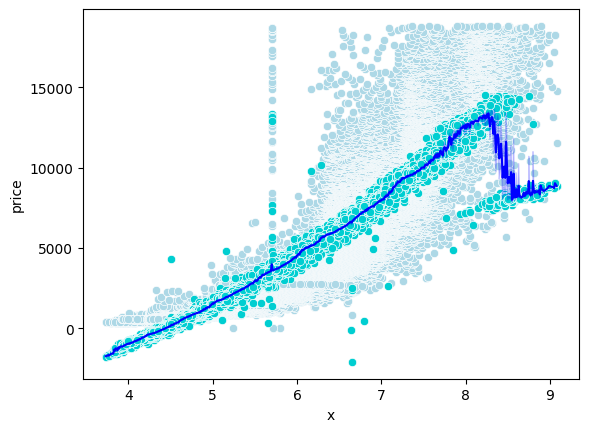

In [84]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='x', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='x', y='Predicciones5', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='x', y='Predicciones5', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='price'>

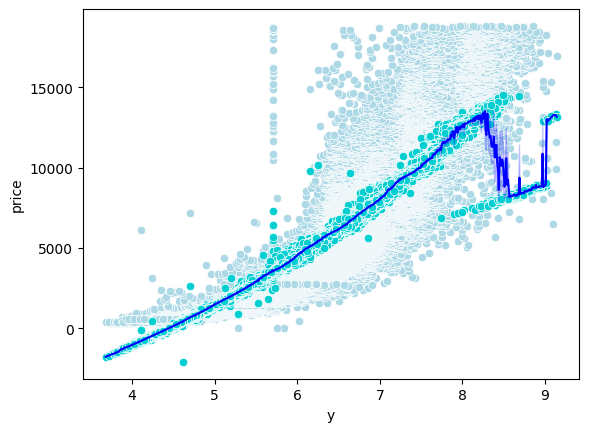

In [85]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='y', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='y', y='Predicciones5', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='y', y='Predicciones5', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='z', ylabel='price'>

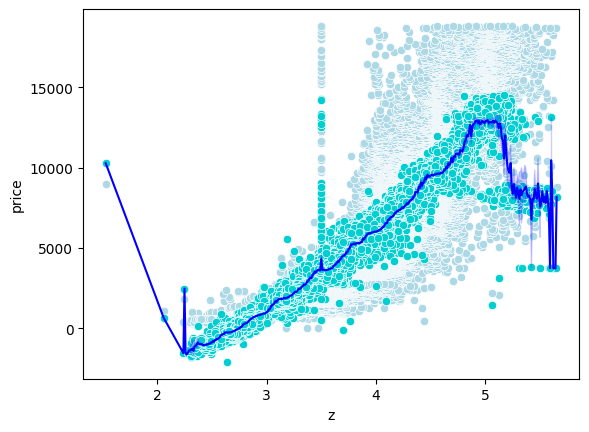

In [87]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='z', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='z', y='Predicciones5', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='z', y='Predicciones5', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carat', ylabel='price'>

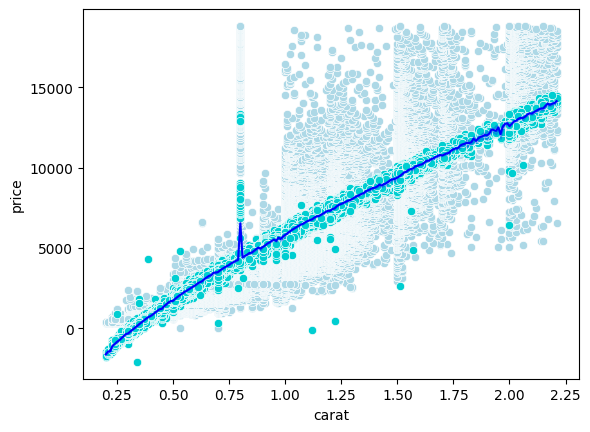

In [86]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='carat', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='carat', y='Predicciones5', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='carat', y='Predicciones5', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='depth', ylabel='price'>

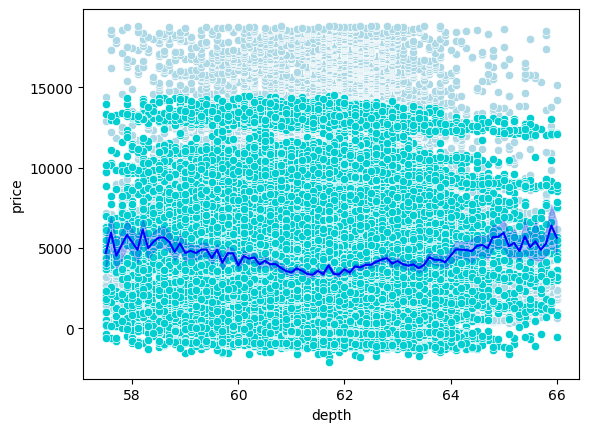

In [88]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='depth', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='depth', y='Predicciones5', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='depth', y='Predicciones5', color="blue", data=Data_outliers)

In [89]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Mi varieble y siempre sera y= Es fija siempre en todos los analisis y es dependiente
Vars_IndepM6= Data_outliers[["x","y","z","carat","depth","table"]]
Var_DepM6= Data_outliers['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM6= LinearRegression()

In [90]:
#Ajustamos el modelo con las variables antes declaradas
modelM6.fit(X=Vars_IndepM6, y=Var_DepM6)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelM6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['x', 'y', 'z', 'carat', 'depth', 'table'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-890.22400066, 2552.76963115, -265.42200365, 4456.15631983,
         -42.28614803,  -79.62558165]),
 'rank_': 6,
 'singular_': array([548.03553836, 396.54931884, 278.83730623,  28.80062042,
         14.1958788 ,  12.13971675]),
 'intercept_': -969.9005965372976}

In [91]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_DeterM6=modelM6.score(X=Vars_IndepM6, y=Var_DepM6)
coef_CorrelM6=np.sqrt(coef_DeterM6)
coef_CorrelM6

0.8986946560498061

In [92]:
#Modelo predictivo
y_pred6= modelM6.predict(X=Data_outliers[["x","y","z","carat","depth","table"]])
y_pred6

array([ -926.32687725, -1693.44070978, -1558.46241619, ...,
        3232.46516008,  4790.44901412,  4191.22696266])

In [93]:
#Añadir una nueva columna al DataFrame donde se guarden los valores de y_pred
Data_outliers.insert(0, 'Predicciones6', y_pred6)
Data_outliers

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,carat,depth,x,y,z,cut,color,clarity,table,price
0,-926.326877,-1083.327020,-1680.330878,3352.976352,-328.957855,-432.613585,0.23,61.5,3.95,3.98,2.43,Ideal,E,SI2,55.0,326.0
1,-1693.440710,-1452.041216,-2172.375828,4613.563358,-860.191731,-459.457370,0.21,59.8,3.89,3.84,2.31,Premium,E,SI1,61.0,326.0
2,-1558.462416,-943.625681,-1546.085929,5661.457967,-948.963313,-448.061868,0.23,61.7,4.05,4.07,2.31,Good,E,VS1,65.0,327.0
3,-573.339769,-461.542221,-842.532523,4102.983281,-37.267688,-27.668296,0.29,62.4,4.20,4.23,2.63,Premium,I,VS2,58.0,334.0
4,-372.423821,-233.515885,-423.715738,4164.550186,121.962913,60.968620,0.31,63.3,4.34,4.35,2.75,Good,J,SI2,58.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3785.064058,3716.461672,3975.906620,3764.050998,3448.190788,3496.232994,0.72,60.8,5.75,5.76,3.50,Ideal,D,SI1,57.0,2757.0
53936,3845.746404,3721.890418,4054.016957,3462.428627,3572.191880,3318.577743,0.72,63.1,5.69,5.75,3.61,Good,D,SI1,55.0,2757.0
53937,3232.465160,3486.159366,3816.607190,4589.306366,3102.958550,3183.595980,0.70,62.8,5.66,5.68,3.56,Very Good,D,SI1,60.0,2757.0
53938,4790.449014,4810.401576,5133.001401,4055.097910,4500.804453,4533.795033,0.86,61.7,6.15,6.12,3.74,Premium,H,SI2,58.0,2757.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='price'>

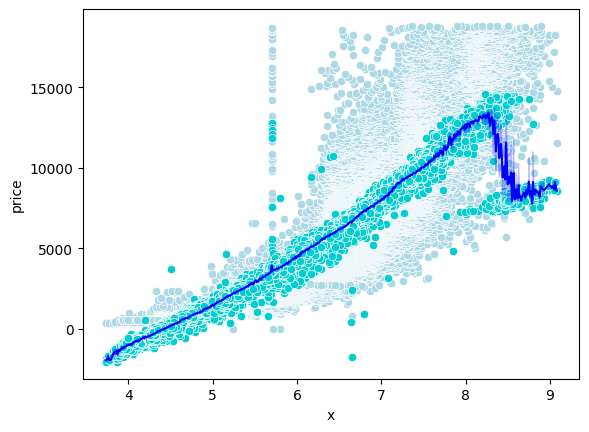

In [94]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='x', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='x', y='Predicciones6', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='x', y='Predicciones6', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='price'>

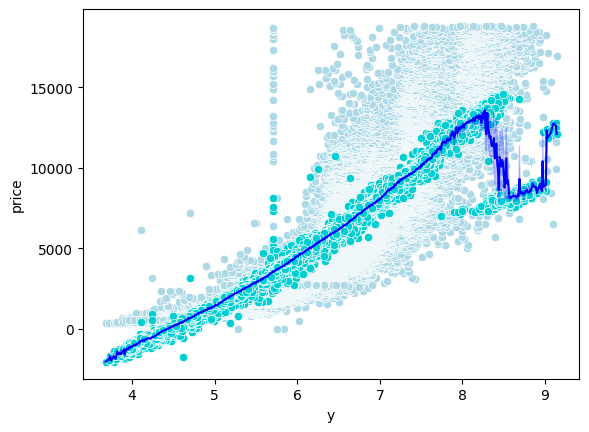

In [95]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='y', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='y', y='Predicciones6', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='y', y='Predicciones6', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='z', ylabel='price'>

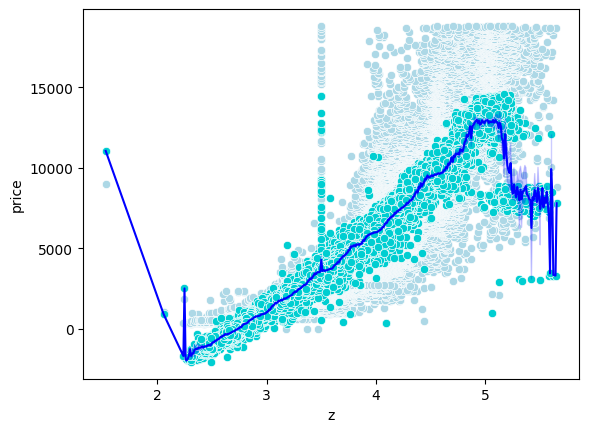

In [96]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='z', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='z', y='Predicciones6', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='z', y='Predicciones6', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carat', ylabel='price'>

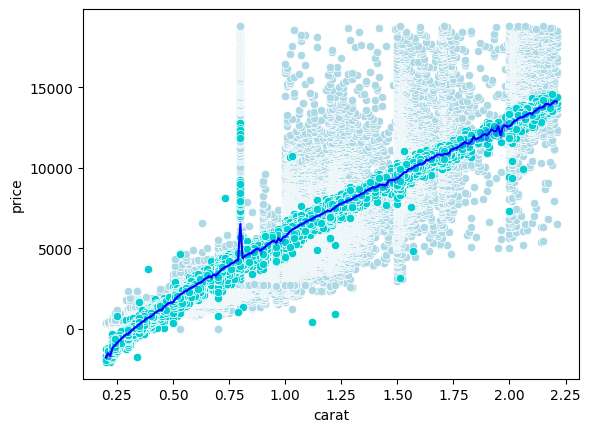

In [97]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='carat', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='carat', y='Predicciones6', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='carat', y='Predicciones6', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='depth', ylabel='price'>

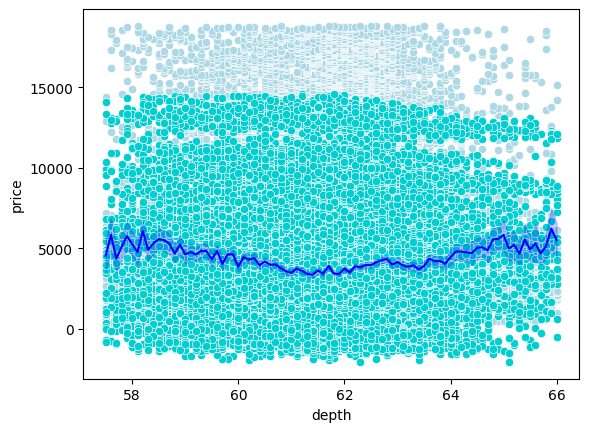

In [98]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='depth', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='depth', y='Predicciones6', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='depth', y='Predicciones6', color="blue", data=Data_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='table', ylabel='price'>

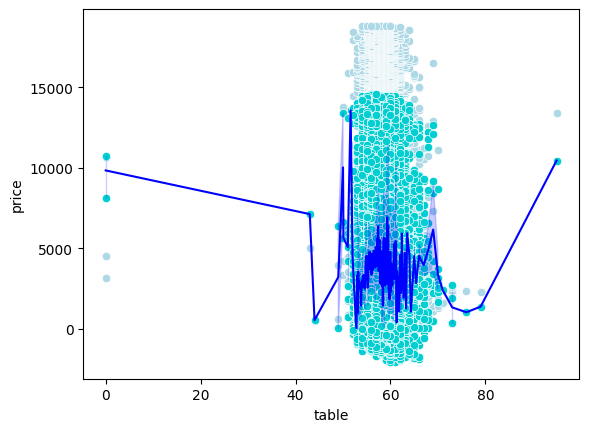

In [99]:
#Crear gráficos de dispersión con el valor actual de precio y las predicciones
sns.scatterplot(x='table', y='price', color="lightblue", data=Data_outliers)
sns.scatterplot(x='table', y='Predicciones6', color="darkturquoise", data=Data_outliers)
sns.lineplot(x='table', y='Predicciones6', color="blue", data=Data_outliers)